In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [4]:
#1. 데이터 구성(1)
df_raw = pd.read_csv("../data/Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [5]:
#1. 데이터 구성(2) - 데이터 분리
df_raw_x = df_raw.drop("diagnosis", axis=1)
df_raw_y = df_raw["diagnosis"]
df_raw_y.head()
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
#2. 데이터 확인 및 scaling(1) - 요약 통계량을 통해 scaling 필요성 확인
df_raw_x.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


In [9]:
#2. 데이터 확인 및 scaling(2)

x_cols = df_raw_x.columns #변수 이름 저장

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x) #scale 변환: ndarray 형식

print("Scaled_data:\n", nd_scaled[:5].round(3))
print("Shape:\n", nd_scaled.shape)

Scaled_data:
 [[-0.158 -0.879 -0.166 -0.233 -0.745 -0.479 -0.551 -0.628 -0.997 -0.393
  -0.693 -1.741 -0.65  -0.516 -0.499 -0.513 -0.671 -0.865 -0.592 -0.457
  -0.149 -1.156 -0.154 -0.225  0.491  0.139 -0.094 -0.302  0.526  0.511]
 [-1.313 -2.561 -1.329 -1.15  -0.24  -1.154 -1.143 -1.2   -1.774  0.184
  -0.995 -1.649 -1.003 -0.784  0.325 -1.023 -1.067 -1.361 -0.892 -0.801
  -1.342 -2.517 -1.38  -1.124  0.254 -1.046 -1.159 -1.48  -1.388 -0.507]
 [ 0.695 -0.421  0.603  0.596 -0.947 -0.675 -0.478 -0.212 -0.899 -1.174
  -0.734 -1.505 -0.715 -0.471 -1.419 -1.058 -0.936 -1.127 -1.099 -1.269
   0.535 -0.143  0.445  0.432 -0.613 -0.367  0.004  0.173  0.224 -0.887]
 [-0.211 -1.301 -0.256 -0.309 -1.292 -0.661 -0.788 -0.834 -0.659 -0.834
  -0.774 -1.593 -0.712 -0.572 -1.276 -0.594 -0.557 -0.841 -1.011 -0.684
  -0.263 -1.491 -0.313 -0.354 -1.339 -0.169 -0.177 -0.458 -0.524 -0.221]
 [-0.754 -1.738 -0.82  -0.746 -2.095 -1.505 -1.175 -1.326 -1.934 -0.957
  -1.055 -1.518 -1.008 -0.763 -0.761 -0.826 -0

In [14]:
#2. 데이터 확인 및 scaling(3)

df_scaled  = pd.DataFrame(nd_scaled, columns = x_cols)  #데이터프레임으로 저장

In [15]:
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [16]:
df_scaled.describe().round(3) #scale 변환된 데이터의 요약 통계량

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,...,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.144,-2.561,-2.137,-1.629,-3.284,-1.690,-1.442,-1.607,-2.164,-1.772,...,-1.906,-2.517,-1.914,-1.422,-2.234,-1.477,-1.648,-2.165,-2.146,-1.602
25%,-0.711,-0.691,-0.706,-0.725,-0.641,-0.737,-0.819,-0.899,-0.724,-0.728,...,-0.751,-0.654,-0.771,-0.750,-0.645,-0.734,-0.794,-0.813,-0.670,-0.683
50%,-0.156,-0.026,-0.114,-0.242,-0.055,-0.139,-0.133,-0.041,-0.077,-0.172,...,-0.157,-0.057,-0.122,-0.257,0.016,-0.182,-0.062,0.107,-0.134,-0.225
75%,0.751,0.525,0.717,0.684,0.611,0.567,0.560,0.595,0.580,0.561,...,0.749,0.614,0.714,0.633,0.581,0.554,0.611,0.768,0.332,0.528
max,3.316,4.574,3.313,4.327,4.501,3.889,3.597,3.221,4.272,4.842,...,3.382,3.694,3.564,4.876,3.648,4.283,3.816,2.166,5.179,6.004


In [20]:
#3. 주성분 분석(1)

pca = PCA(n_components=10)
nd_pca = pca.fit_transform(df_scaled)

print("PCA_data:\n", nd_pca[:5]) #생성된 주성분 점수 확인
print("Shape:\n", nd_scaled.shape)

PCA_data:
 [[-2.00389702 -0.25805811 -1.84890296 -1.31467512  0.62472622  0.78945168
   0.13210868 -1.01407999  0.49747257 -0.51115436]
 [-5.84906746  0.21164764 -0.16808736 -2.95641861  1.83054388 -0.40516509
   0.32301073 -0.52661021  0.41109122  0.13366786]
 [-1.54904826 -2.92566391 -2.44246291 -0.46586769  0.09042314  1.03234868
  -0.57968881 -0.05571789  0.21228907  0.05703148]
 [-3.11249085 -1.32153438 -1.21958526 -1.44380449  0.69955798  1.98733066
   0.29057355  0.05944204 -0.23005287  0.11689425]
 [-5.82479946 -1.67892363  0.05729344 -1.50169681  0.84564816  2.02590247
   0.24805198 -0.42078024  0.22556834  0.17548047]]
Shape:
 (320, 30)


In [21]:
#3. 주성분 분석(2) - 주성분 점수

df_pca = pd.DataFrame(nd_pca, columns=["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6", "Prin7", "Prin8", "Prin9", "Prin10"])

df_scaled_pca = df_scaled.join(df_pca) #주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,0.789452,0.132109,-1.014080,0.497473,-0.511154
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-5.849067,0.211648,-0.168087,-2.956419,1.830544,-0.405165,0.323011,-0.526610,0.411091,0.133668
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,1.032349,-0.579689,-0.055718,0.212289,0.057031
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,1.987331,0.290574,0.059442,-0.230053,0.116894
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-5.824799,-1.678924,0.057293,-1.501697,0.845648,2.025902,0.248052,-0.420780,0.225568,0.175480


In [22]:
#3. 주성분 분석(3) - 고유값 확인 및 주성분 개수 결정
# 주성분 분석 통계량 저장: 주성분 번호, Eigenvalue, Eigenvalue ratio 

df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,11)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914
7,8,0.534,0.018,0.931
8,9,0.376,0.012,0.944
9,10,0.321,0.011,0.954


## 1) 상관계수 기준일 경우, 고유값이 1이상인 적정 주성분은 PrinNo 1~6까지로 6개이다.
## 2) 공분산 기준일 경우, 고유값 누적 비율이 0.8 이상이 되는 적정 주성분은 PrinNo 1~4까지로 4개이다.

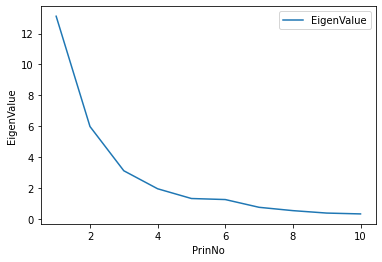

In [26]:
#3. 주성분 분석(4) - Screen Plot 확인 및 주성분 개수 결정

plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="EigenValue")
plt.ylabel("EigenValue")
plt.xlabel("PrinNo")
plt.legend(loc="best")

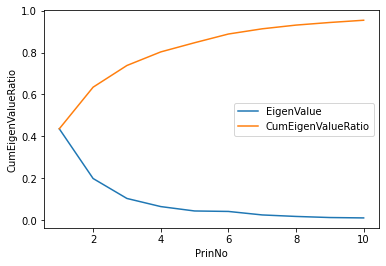

In [29]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="EigenValue")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="CumEigenValueRatio")

plt.ylabel("CumEigenValueRatio")
plt.xlabel("PrinNo")
plt.legend(loc="best")

In [31]:
#3. 주성분 분석(5) - 고유 벡터 확인 및 해석

# 주성분 분석 데이터의 변수 이름 저장 
x_cols = pd.DataFrame({"Feature" : df_raw_x.columns})

#주성분 Prin1~6까지의 고유벡터 저장
df_eigenvector=pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,  
                         columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10"])]
                         , axis=1)
df_eigenvector.round(2)


,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10
0,mean_radius,-0.21,0.24,0.03,0.03,-0.01,-0.07,0.16,-0.10,-0.20,0.01
1,mean_texture,-0.11,0.05,0.04,-0.60,0.04,0.10,-0.03,0.14,0.10,-0.23
2,mean_perimeter,-0.22,0.22,0.02,0.03,-0.01,-0.07,0.15,-0.11,-0.18,-0.03
3,mean_area,-0.21,0.24,-0.00,0.04,-0.01,-0.03,0.08,-0.05,-0.23,-0.04
4,mean_smoothness,-0.15,-0.19,0.06,0.20,-0.04,0.47,0.07,-0.20,-0.01,-0.11
5,mean_compactness,-0.24,-0.16,0.05,0.05,-0.02,-0.04,-0.02,-0.14,0.01,-0.19
6,mean_concavity,-0.26,-0.05,0.00,0.05,-0.06,-0.02,0.11,-0.06,0.02,-0.40
7,mean_concave_points,-0.26,0.04,0.04,0.09,-0.01,0.07,0.15,-0.19,-0.01,-0.17
8,mean_symmetry,-0.15,-0.20,0.05,0.14,0.43,0.06,0.05,-0.22,0.18,-0.18
9,mean_fractal_dimension,-0.08,-0.35,-0.00,0.08,-0.06,0.10,-0.29,-0.18,-0.10,-0.09


In [18]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,0.0,0.0,1.0,-0.0,0.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0,-0.0,-0.0
Prin5,-0.0,0.0,0.0,-0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


In [33]:
# 4. object값을 int형으로 변환
df_raw_y = np.where(df_raw_y == '음성', 0, df_raw_y)
df_raw_y = np.where(df_raw_y == '양성', 1, df_raw_y)
df_raw_y = df_raw_y.astype(np.float64)

## 주성분은 서로 독립적이기에 상관계수가 0이 나온다.

In [34]:
#5. 주성분 상관/회귀분석(1) - 다중선형 회귀분석: 원 데이터 활용

#원 데이터에 절편 추가
df_raw_x_const = sm.add_constant(df_raw_x)

#회귀모델 생성 및 적합
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     28.79
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.12e-69
Time:                        07:28:48   Log-Likelihood:                 6.9483
No. Observations:                 320   AIC:                             48.10
Df Residuals:                     289   BIC:                             164.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [36]:
#5. 주성분 상관/회귀분석(2) - 다중선형 주성분 회귀분석: 주성분 점수 데이터 활용
x_var = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"]

#선택된 주성분 점수 데이터에 절편 추가
df_pca_const = sm.add_constant(df_pca[x_var])

#회귀모델 생성 및 적합
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     88.78
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.38e-64
Time:                        07:39:30   Log-Likelihood:                -55.358
No. Observations:                 320   AIC:                             124.7
Df Residuals:                     313   BIC:                             151.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3375      0.016     20.756      0.0

## P-value를 확인해보면, 주성분 Prin5 외의 나머지 5개의 주성분은 P-value가 0.05보다 작기에 유의미하다고 볼 수 있다. 

In [40]:
#5. 주성분 상관/회귀분석(3) - 다중선형 주성분 회귀분석: 주성분 점수 데이터 활용
#주성분 Prin5를 제외한 5개의 주성분 사용

x_var = ["Prin1","Prin2","Prin3","Prin4", "Prin6"]

#선택된 주성분 점수 데이터에 절편 추가
df_pca_const = sm.add_constant(df_pca[x_var])

#회귀모델 생성 및 적합
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     106.7
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.53e-65
Time:                        07:55:32   Log-Likelihood:                -55.547
No. Observations:                 320   AIC:                             123.1
Df Residuals:                     314   BIC:                             145.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3375      0.016     20.777      0.0

## 주성분 Prin5를 제외한 5개 주성분의 P-value를 확인하면, 모두 0.05보다 작다.

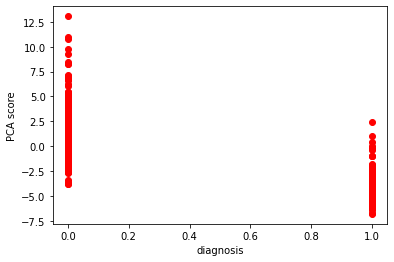

In [51]:
#6. 주성분으로 2차원 산점도 그리기(1)

df_pca_prin1 = df_pca_const["Prin1"]

plt.scatter(df_raw_y, df_pca_prin1, c="red")

plt.ylabel("PCA score")
plt.xlabel("diagnosis")
plt.show()

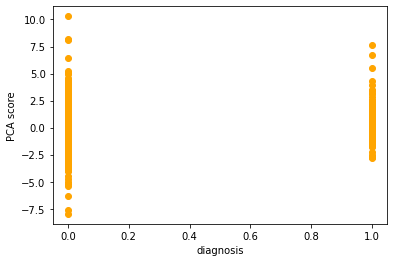

In [52]:
#6. 주성분으로 2차원 산점도 그리기(2)

df_pca_prin2 = df_pca_const["Prin2"]

plt.scatter(df_raw_y, df_pca_prin2, c="orange")

plt.ylabel("PCA score")
plt.xlabel("diagnosis")
plt.show()

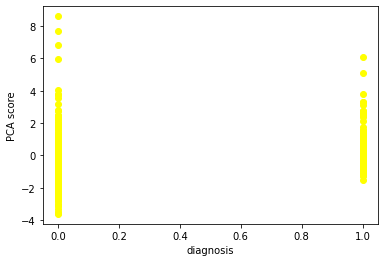

In [53]:
#6. 주성분으로 2차원 산점도 그리기(3)

df_pca_prin3 = df_pca_const["Prin3"]

plt.scatter(df_raw_y, df_pca_prin3, c="yellow")

plt.ylabel("PCA score")
plt.xlabel("diagnosis")
plt.show()

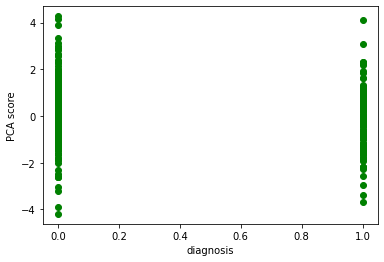

In [54]:
#6. 주성분으로 2차원 산점도 그리기(4)

df_pca_prin4 = df_pca_const["Prin4"]

plt.scatter(df_raw_y, df_pca_prin4, c="green")

plt.ylabel("PCA score")
plt.xlabel("diagnosis")
plt.show()

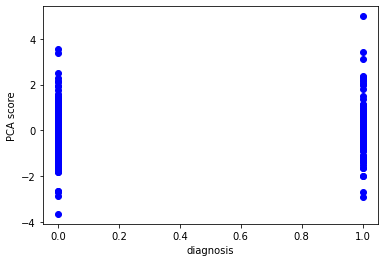

In [55]:
#6. 주성분으로 2차원 산점도 그리기(5)

df_pca_prin6 = df_pca_const["Prin6"]

plt.scatter(df_raw_y, df_pca_prin6, c="blue")

plt.ylabel("PCA score")
plt.xlabel("diagnosis")
plt.show()

## 결론: 대체로 음성인 경우, PCA 점수가 -4 ~ 4 사이에 분포되어 있으며
## 양성인 경우, PCA 점수가 -2 ~ 2 사이에 분포되어 있다는 것을 볼 수 있다.